In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Step 1: Load the data

In [3]:
df = pd.read_csv('telugu_movies_sample.csv')
print(df.head())

                     title  year            genre  rating
0                     Arya  2004  Action, Romance     7.5
1                     Eega  2012  Fantasy, Action     7.7
2               Magadheera  2009  Action, Romance     7.8
3                   Jersey  2019    Sports, Drama     8.0
4  Ala Vaikunthapurramuloo  2020   Action, Comedy     8.1


In [4]:
df.describe()

,year,rating
count,10.000000,10.000000
mean,2013.700000,7.780000
std,5.657836,0.252982
min,2004.000000,7.500000
25%,2009.750000,7.525000
50%,2016.000000,7.750000
75%,2017.750000,8.000000
max,2020.000000,8.100000


In [5]:
df.shape

(10, 4)

In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   title   10 non-null     object 
 1   year    10 non-null     int64  
 2   genre   10 non-null     object 
 3   rating  10 non-null     float64
dtypes: float64(1), int64(1), object(2)
memory usage: 452.0+ bytes
None


### Step 2: Data preprocessing & Cleaning

In [7]:
# Check for missing values
print(df.isnull().sum())

title     0
year      0
genre     0
rating    0
dtype: int64


In [8]:
# Check data types
print(df.dtypes)

title      object
year        int64
genre      object
rating    float64
dtype: object


In [9]:
# Convert 'year' to integer if needed
df['year'] = df['year'].astype(int)

### Step 3: Exploratory Data Analysis (EDA)

#### Distribution of movie ratings

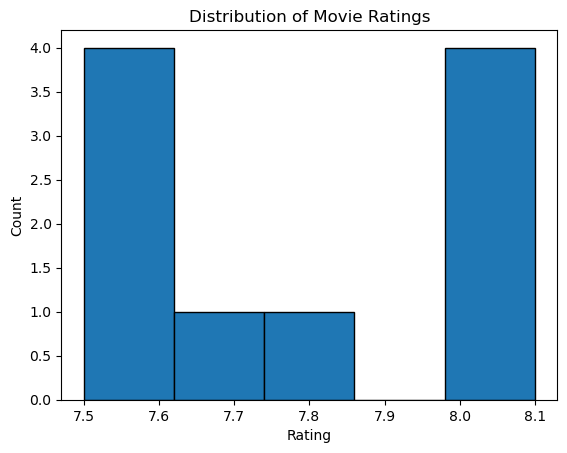

In [10]:
plt.hist(df['rating'], bins=5, edgecolor='black')
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

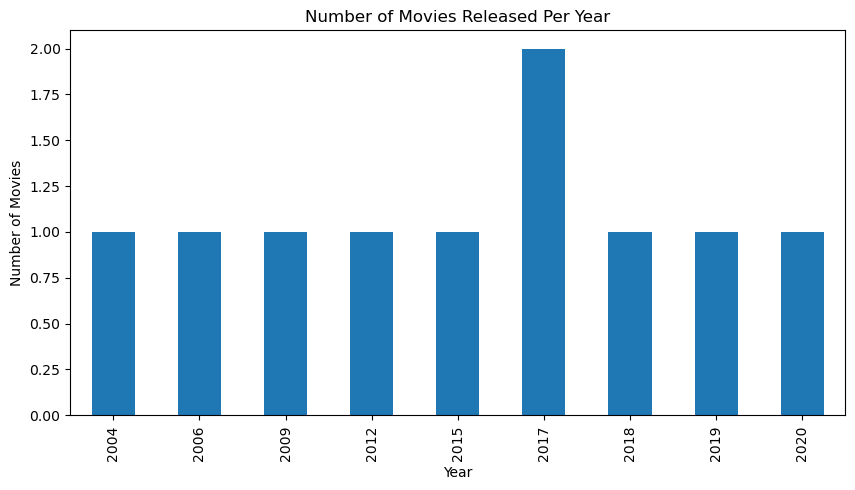

In [11]:
# Movies per year
df['year'].value_counts().sort_index().plot(kind='bar', figsize=(10,5))
plt.title('Number of Movies Released Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.show()


In [13]:
df['genre'] = df['genre'].apply(lambda x: x.split(', ') if isinstance(x, str) else x)


In [14]:
# Count genres
from collections import Counter
genre_list = sum(df['genre'].tolist(), [])
genre_counts = Counter(genre_list)
print("Top genres:", genre_counts.most_common())


Top genres: [('Action', 7), ('Drama', 5), ('Romance', 4), ('Fantasy', 1), ('Sports', 1), ('Comedy', 1), ('Thriller', 1)]


#### Step 4: Building the Recommender System

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity


In [17]:
# Step 1: Convert genre list into a single string
df['genre_str'] = df['genre'].apply(lambda x: ' '.join(x))


In [18]:
# Step 2: Convert text to vector using CountVectorizer
vectorizer = CountVectorizer()
genre_matrix = vectorizer.fit_transform(df['genre_str'])


In [19]:
# Step 3: Compute cosine similarity between movies
similarity_matrix = cosine_similarity(genre_matrix)

In [21]:
# Step 4: Function to recommend movies
def recommend_movies(title, df, similarity_matrix):
    if title not in df['title'].values:
        return f"Movie '{title}' not found in dataset."
    # Get index of the movie
    index = df[df['title'] == title].index[0]
    # Get similarity scores
    similarity_scores = list(enumerate(similarity_matrix[index]))
    # Sort by similarity score
    sorted_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)
    # Get top 5 similar movies (excluding the movie itself)
    top_movies = [df.iloc[i[0]]['title'] for i in sorted_scores[1:6]]
    return top_movies


In [22]:
def recommend_movies(title, df, similarity_matrix, top_n=5):
    if title not in df['title'].values:
        return f"Movie '{title}' not found in dataset."

    # Get index of the selected movie
    index = df[df['title'] == title].index[0]

    # Get similarity scores
    similarity_scores = list(enumerate(similarity_matrix[index]))

    # Exclude the movie itself and sort by similarity
    sorted_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)[1:]

    # Get top 20 similar movies (before filtering by rating/year)
    similar_movies = [df.iloc[i[0]] for i in sorted_scores[:20]]

    # Create a temporary DataFrame
    similar_df = pd.DataFrame(similar_movies)

    # Sort by rating (descending), then by year (descending)
    recommended_df = similar_df.sort_values(by=['rating', 'year'], ascending=[False, False])

    # Get top N movie titles
    return recommended_df['title'].head(top_n).tolist()


In [23]:
recommendations = recommend_movies("Magadheera", df, similarity_matrix)
print("Recommended movies like 'Magadheera':", recommendations)

Recommended movies like 'Magadheera': ['Ala Vaikunthapurramuloo', 'Bahubali: The Beginning', 'Jersey', 'Rangasthalam', 'Magadheera']


### Step 5: conclusion

### Conclusion

#### This mini project successfully built a content-based Telugu movie recommender system that suggests movies based on genre similarity, rating, and release year.

#### The system helps users discover relevant and high-quality Telugu movies released between 2000 and the present.
